In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
ny = pd.read_excel('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013.xls', sheet_name='13tbl8ny')
ny.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,1861,0,0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,2577,3,0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,2846,3,0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,97956,791,8,NaN,30,227,526,4090,705,3243,142,NaN
4,Albion Village,6388,23,0,NaN,3,4,16,223,53,165,5,NaN


In [4]:
ny.columns

Index(['City', 'Population', 'Violent\ncrime',
       'Murder and\nnonnegligent\nmanslaughter',
       'Rape\n(revised\ndefinition)1', 'Rape\n(legacy\ndefinition)2',
       'Robbery', 'Aggravated\nassault', 'Property\ncrime', 'Burglary',
       'Larceny-\ntheft', 'Motor\nvehicle\ntheft', 'Arson3'],
      dtype='object')

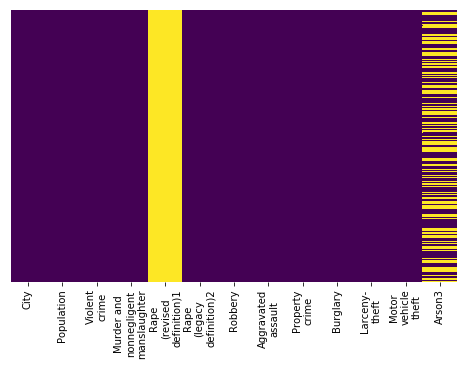

In [5]:
fig = plt.figure(figsize=(8,5))
sns.heatmap(ny.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.show()

In [6]:
property = ny[['Population', 'Murder and\nnonnegligent\nmanslaughter', 'Robbery', 'Property\ncrime']]
property.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861,0,0,12
1,2577,0,0,24
2,2846,0,0,16
3,97956,8,227,4090
4,6388,0,4,223


In [7]:
property['Population sq'] = property['Population'] * property['Population']

In [8]:
property.head()

,Population,Murder and nonnegligent manslaughter,Robbery,Property crime,Population sq
0,1861,0,0,12,3463321
1,2577,0,0,24,6640929
2,2846,0,0,16,8099716
3,97956,8,227,4090,9595377936
4,6388,0,4,223,40806544


In [9]:
def binary(col):
    if col == 0:
        return col
    else:
        return 1

In [10]:
property['Murder and\nnonnegligent\nmanslaughter'] = property['Murder and\nnonnegligent\nmanslaughter'].apply(binary)

In [11]:
property['Robbery'] = property['Robbery'].apply(binary)
#property['Property\ncrime'] = property['Property\ncrime'].apply(binary)

In [12]:
property = property[['Population', 'Population sq','Murder and\nnonnegligent\nmanslaughter','Robbery','Property\ncrime' ]]

In [13]:
property.head()

,Population,Population sq,Murder and nonnegligent manslaughter,Robbery,Property crime
0,1861,3463321,0,0,12
1,2577,6640929,0,0,24
2,2846,8099716,0,0,16
3,97956,9595377936,1,1,4090
4,6388,40806544,0,1,223


## X and y arrays

In [14]:
X = property[['Population','Population sq','Murder and\nnonnegligent\nmanslaughter','Robbery']]
y = property['Property\ncrime']

## Train Test Split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

## Creating and Training the Model

In [17]:
from sklearn.linear_model import LinearRegression

In [18]:
lm = LinearRegression()

In [19]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

## Model Evaluation

In [20]:
#coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
#coeff_df
print('\nCoefficients: \n', lm.coef_)
print('\nIntercept: \n', lm.intercept_)
print('\nR-squared:')
print(lm.score(X_train, y_train))


Coefficients: 
 [8.84892092e-03 1.15712395e-07 1.06088508e+02 1.41646297e+02]

Intercept: 
 -0.08631863674685292

R-squared:
0.8309788569859782
